In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import json
import random
import statistics
import numpy as np

from rtree import index
from utils import *

In [2]:
G = ox.save_load.load_graphml(filename="Singapore_drive.graphml")
nodes = ox.graph_to_gdfs(G, nodes=True, edges=False)

# get 100 sources
sources = nodes['osmid'].values[:100]
# get 100 targets
targets = nodes['osmid'].values[-100:]

In [3]:
# Fill in all nodes to find neighbours
# key: node label ,value: location
idx = index.Index()

xx = nodes['x'].astype(float)
yy = nodes['y'].astype(float)
node_id = nodes['osmid']

for node, x, y in zip(node_id, xx, yy):
    idx.insert(int(node), (x,y,x,y))

In [ ]:
# # Read euclidean_lengths from file:
# euclidean_distances = json.load( open("data/euclidean_distances.json"))

In [4]:
def bingo(sources, targets):
    
    h_time = []
    mh_time = []
    h_query = []
    e_query = []
    mh_query = []
    
    count = 0
    for s,t in zip(sources,targets):
        orig_point = nodes[nodes['osmid'] == s].geometry.values[0]
        target_point = nodes[nodes['osmid'] == t].geometry.values[0]
        orig_xy = (orig_point.y, orig_point.x)
        target_xy = (target_point.y, target_point.x)

        # Find all nodes within 500m from candidate sources and destinations
        candidate_dest = find_nearest_nodes(nodes, target_xy, 500, idx)
        candidate_source = find_nearest_nodes(nodes, orig_xy, 500, idx)

        eq = len(candidate_dest) * len(candidate_source)
        e_query.append(eq)

        euclidean = get_length_dict(nodes, candidate_source, candidate_dest)        
        (ht, hq, mht, mhq) = modified_hybrid_search(nodes, euclidean)
        
        h_time.append(ht)
        h_query.append(hq)
        mh_time.append(mht)
        mh_query.append(mhq)
        
        count += 1
        print(count, s, t, hq, mhq, eq)

    return mh_query, mh_time, h_query, h_time, e_query

## Off-peak

In [5]:
mh_query_off, mh_time_off, h_query_off, h_time_off, e_query_off = bingo(sources, targets)

1 1820000257 1389166316 1 1 3400
2 3874553858 366214892 13794 5076 13794
3 1820000259 4715577070 1947 1366 3710
4 3874553857 244383471 5712 2597 7056
5 2083586053 366214896 7459 2922 7938
6 889323526 4715577074 2989 1101 2989
7 3874553861 4715577076 6670 2455 6670
8 244908034 240713461 814 301 814
9 237568006 244383478 943 943 3036
10 2083586060 4700110585 753 281 759
11 1820000270 4700110588 3498 1288 3498
12 4604559376 1389166333 15 15 1728
13 889323538 242941694 6804 2505 6804
14 535167001 240713471 1084 1084 4752
15 6383009820 244383486 95 95 1088
16 244908061 366214914 1254 463 1254
17 4006805534 244383493 1790 1673 4544
18 4006805535 4952030981 1 1 3016
19 244908064 366214919 2552 940 2552
20 3731816477 4607049479 2576 949 2576
21 3731816479 1389166346 22 22 2640
22 4006805539 366214922 41 41 5665
23 1820000293 4607049483 166 166 2916
24 3731816485 366214923 4463 1834 4982
25 4006805546 5136318220 396 396 3596
26 4006805547 1389166351 310 310 4752
27 535167020 4607049486 1409 140

## Mod-peak

In [7]:
mh_query_mod, mh_time_mod, h_query_mod, h_time_mod, e_query_mod = bingo(sources, targets)

1 1820000257 1389166316 2636 1252 3400
2 3874553858 366214892 13794 5076 13794
3 1820000259 4715577070 3696 1366 3710
4 3874553857 244383471 7056 2597 7056
5 2083586053 366214896 7938 2922 7938
6 889323526 4715577074 2989 1101 2989
7 3874553861 4715577076 6670 2455 6670
8 244908034 240713461 814 301 814
9 237568006 244383478 3036 1118 3036
10 2083586060 4700110585 759 281 759
11 1820000270 4700110588 3498 1288 3498
12 4604559376 1389166333 1340 637 1728
13 889323538 242941694 6804 2505 6804
14 535167001 240713471 1742 1742 4752
15 6383009820 244383486 1088 402 1088
16 244908061 366214914 1254 463 1254
17 4006805534 244383493 4544 1673 4544
18 4006805535 4952030981 2922 1111 3016
19 244908064 366214919 2552 940 2552
20 3731816477 4607049479 2576 949 2576
21 3731816479 1389166346 22 22 2640
22 4006805539 366214922 42 42 5665
23 1820000293 4607049483 252 252 2916
24 3731816485 366214923 4982 1834 4982
25 4006805546 5136318220 396 396 3596
26 4006805547 1389166351 4752 1750 4752
27 5351670

## High-peak

In [8]:
mh_query_high, mh_time_high, h_query_high, h_time_high, e_query_high = bingo(sources, targets)

1 1820000257 1389166316 3399 1252 3400
2 3874553858 366214892 13794 5076 13794
3 1820000259 4715577070 3710 1366 3710
4 3874553857 244383471 7056 2597 7056
5 2083586053 366214896 7938 2922 7938
6 889323526 4715577074 2989 1101 2989
7 3874553861 4715577076 6670 2455 6670
8 244908034 240713461 814 301 814
9 237568006 244383478 3036 1118 3036
10 2083586060 4700110585 759 281 759
11 1820000270 4700110588 3498 1288 3498
12 4604559376 1389166333 1598 637 1728
13 889323538 242941694 6804 2505 6804
14 535167001 240713471 4061 1750 4752
15 6383009820 244383486 1088 402 1088
16 244908061 366214914 1254 463 1254
17 4006805534 244383493 4544 1673 4544
18 4006805535 4952030981 3016 1111 3016
19 244908064 366214919 2552 940 2552
20 3731816477 4607049479 2576 949 2576
21 3731816479 1389166346 22 22 2640
22 4006805539 366214922 2246 2086 5665
23 1820000293 4607049483 698 698 2916
24 3731816485 366214923 4982 1834 4982
25 4006805546 5136318220 1275 1275 3596
26 4006805547 1389166351 4752 1750 4752
27 5

## Plot!

In [4]:
import matplotlib.pyplot as plt

# Average of: 
mht = [statistics.mean(mh_time_off), statistics.mean(mh_time_mod), statistics.mean(mh_time_high)] 
ht = [statistics.mean(h_time_off), statistics.mean(h_time_mod), statistics.mean(h_time_high)]
eq = [statistics.mean(e_query_off), statistics.mean(e_query_mod), statistics.mean(e_query_high)]
hq = [statistics.mean(h_query_off), statistics.mean(h_query_mod), statistics.mean(h_query_high)]
mhq = [statistics.mean(mh_query_off), statistics.mean(mh_query_mod), statistics.mean(mh_query_high)]

labels = ["Off-Peak(12:00 A.M.)", "Moderately-Peak(3:00 P.M.)", "High-Peak(6:00 P.M.)"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

def autolabel(rects, ax, xpos='center'):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(math.ceil(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha='center', va='bottom')

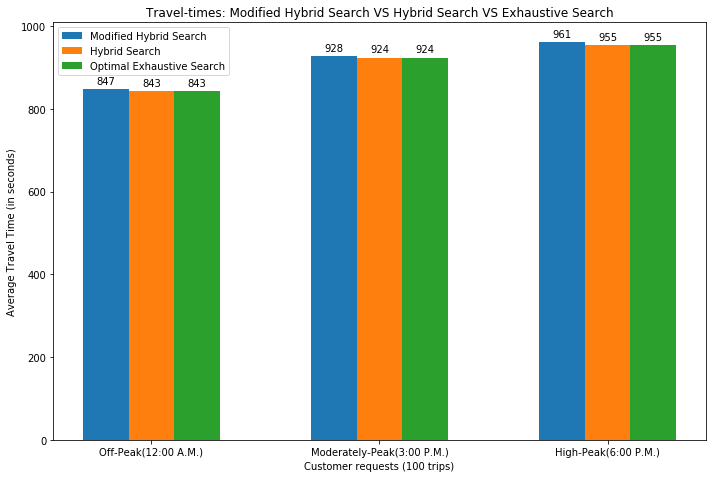

In [12]:
fig1, ax1 = plt.subplots(figsize=(10,6.75))
rects2 = ax1.bar(x - width, mht, width, label='Modified Hybrid Search')
rects1 = ax1.bar(x, ht, width, label='Hybrid Search')
rects6 = ax1.bar(x + width, ht, width, label='Optimal Exhaustive Search')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Travel Time (in seconds)')
ax1.set_xlabel('Customer requests (100 trips)')
ax1.set_title('Travel-times: Modified Hybrid Search VS Hybrid Search VS Exhaustive Search')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

autolabel(rects1, ax1)
autolabel(rects2, ax1)
autolabel(rects6, ax1)
fig1.tight_layout()

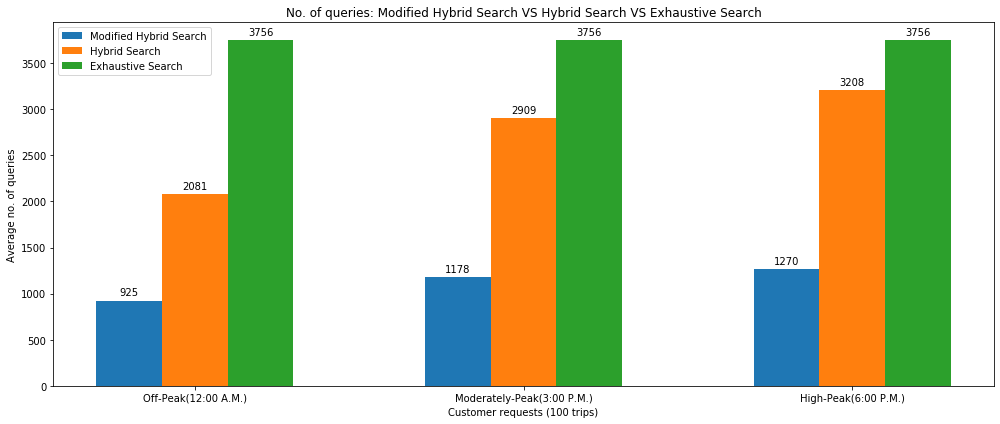

In [28]:
fig2, ax2 = plt.subplots(figsize=(14,6))
rects5 = ax2.bar(x - width, mhq, width, label='Modified Hybrid Search')
rects4 = ax2.bar(x, hq, width, label='Hybrid Search')
rects3 = ax2.bar(x + width, eq, width, label='Exhaustive Search')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Average no. of queries')
ax2.set_xlabel('Customer requests (100 trips)')
ax2.set_title('No. of queries: Modified Hybrid Search VS Hybrid Search VS Exhaustive Search')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend(loc='upper left')

autolabel(rects3, ax2)
autolabel(rects4, ax2)
autolabel(rects5, ax2)
fig2.tight_layout()